# LArIAT Data Visualization

The 2D h5 files store a shape (240,240,4096) "features" tensor that hold the raw output of the simulation/reconstruction. The 3D h5 files store the trajectory from Geant4, which can be used to make a "true" 3D image. This data is in a 2 tensors. "images3D/C" holds the x,y,z coordinates of each trajectory and "images3D/V" hold the corresponding charge. 

This notebook holds a bare-bones example of how to make images from this data. 

In [1]:
BaseDir2D="/data/LArIAT/h5_files_2D_3D/2D_h5/*"
BaseDir3D="/data/LArIAT/h5_files_2D_3D/3D_h5/*"

In [2]:
import h5py
import glob
Files2D=glob.glob(BaseDir2D)
Files3D=glob.glob(BaseDir3D)
print "Number of Files:", len(Files2D)

Number of Files: 6


In [3]:
import os

def OrganizeFiles(Files):
    FileCount= {}  # Store the count here
    FileLists= {}  # Organize the files by particle type here.

    for aFile in Files:
        # Lets strip the path (everything before the "/"s) and get the filename:
        FileName=os.path.basename(aFile)
    
        # Now use everything before the first "_" as the particle name
        ParticleName=FileName.split('_')[0]
    
        if ParticleName in FileCount.keys():
            FileCount[ParticleName]+=1
            FileLists[ParticleName].append(aFile)
        else:
            FileCount[ParticleName]=1
            FileLists[ParticleName]= [aFile]
    
    print "Number of types of particles:", len(FileCount.keys())
    print "----------------------------------------------------------"
    print "Number of files for each particle type:", FileCount
    print "----------------------------------------------------------"
    print "First file of each type:"
    for aFile in FileLists:
        print aFile,":",FileLists[aFile][0]
        
    return FileLists,FileCount

FileLists3D,FileCount3D=OrganizeFiles(Files3D)
FileLists2D,FileCount2D=OrganizeFiles(Files2D)

Number of types of particles: 2
----------------------------------------------------------
Number of files for each particle type: {'muon': 3, 'electron': 3}
----------------------------------------------------------
First file of each type:
muon : /home/sshahsav/DLTool_Apr_9/3D_h5_Apr_9/muon_48.3d.h5
electron : /home/sshahsav/DLTool_Apr_9/3D_h5_Apr_9/electron_134.3d.h5
Number of types of particles: 2
----------------------------------------------------------
Number of files for each particle type: {'muon': 3, 'electron': 3}
----------------------------------------------------------
First file of each type:
muon : /home/sshahsav/DLTool_Apr_9/2D_h5_Apr_9/muon_185.2d.h5
electron : /home/sshahsav/DLTool_Apr_9/2D_h5_Apr_9/electron_182.2d.h5


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#Plots the raw simulated data
def PlotEvent2D(image):
    # Make two plots. Create a 1 by 2 grid the plots.
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)

    # Plot the first view. Note: [EventNumber, View] = [0,0]
    ax1.imshow(image[0])

    # Plot the second view 
    ax2.imshow(image[1])

    # The data is 240 by 4096. Change the aspect ratio so the plot is not squished. 
    ax1.set_aspect(16)  
    ax2.set_aspect(16) 

#Plots the 3D trajectory information from Geant4
def PlotEvent3D(Data_C,Data_V,i,select=False):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if select:
        I=np.where(Data_V[i]>select)
    else:
        I=range(len(Data.V[i]))
    ax.scatter(Data_C[i][:,0][I], Data_C[i][:,1][I], Data_C[i][:,2][I], c=np.log(Data_V[i][I]), zdir='z', s=1, depthshade=True)
    
    plt.show()
    
#Projects turns trajectory to 3D image, then projects to 2D.
def PlotEvent2DProjection(Data3D_C,Data3D_V,i,shape=(240, 240, 4096)):
    image=np.histogramdd(Data3D_C[i], bins=shape, weights=Data3D_V[i])[0]
    
    # Make two plots. Create a 1 by 2 grid the plots.
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)

    # Plot the first view. Note: [EventNumber, View] = [0,0]
    ax1.imshow(np.sum(image,axis=0))

    # Plot the second view 
    ax2.imshow(np.sum(image,axis=1))

    # The data is 240 by 4096. Change the aspect ratio so the plot is not squished. 
    ax1.set_aspect(16)  
    ax2.set_aspect(16) 

def PlotEvent(i,select=False):
    PlotEvent2D(np.array(Data2D[i],dtype='float32'))
    PlotEvent3D(Data3D_C,Data3D_V,i,select)
    PlotEvent2DProjection(Data3D_C,Data3D_V,i)


        

In [5]:
# Load the first 
f2D=h5py.File(FileLists2D["electron"][0],"r")
f3D=h5py.File(FileLists3D["electron"][0],"r")

# Get the 2D images
Data2D=f2D["features"]

# Get the 3D data
Data3D_C=f3D["images3D/C"]
Data3D_V=f3D["images3D/V"]


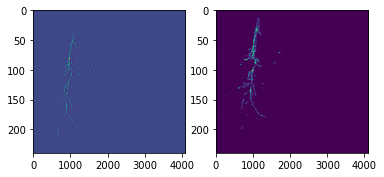

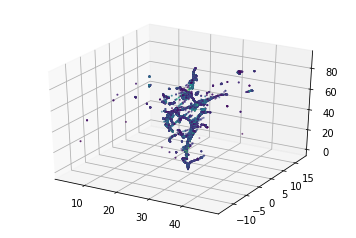

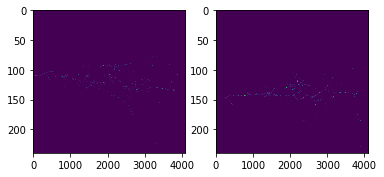

In [6]:

PlotEvent(0,1500)
    